# 1.4.10 Histograms in OpenCV

In [1]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
print(np.transpose(hist))

[[  9651.   1628.   1698.   1743.   1795.   1734.   1693.   1670.   1585.
    1560.   1427.   1484.   1533.   1545.   1632.   1827.   2007.   2218.
    2745.   3301.   4215.   5391.   7443.  11551.  19634. 109656.  55902.
   37564.  29898.  24450.  21180.  18389.  16444.  14646.  13510.  12463.
   11476.  10730.  10022.   9414.   8904.   8576.   8342.   8114.   8120.
    7625.   7647.   7646.   7320.   7249.   7300.   7197.   7228.   7395.
    7354.   7293.   7532.   7563.   8004.   8262.   8469.   8725.   9053.
    9573.  10014.  10611.  11147.  12049.  12835.  13822.  14441.  15054.
   15985.  16251.  16649.  17067.  17359.  17565.  17682.  18325.  19281.
   20705.  22461.  24920.  26891.  29760.  32199.  34092.  35160.  35303.
   34828.  34732.  34347.  33207.  32357.  31006.  29644.  28342.  27325.
   26371.  25727.  25732.  26464.  27404.  27809.  27824.  27138.  26610.
   26223.  25577.  25120.  24680.  24352.  24238.  24226.  24560.  24471.
   24386.  24763.  24820.  24827.  252

In [5]:
hist = np.bincount(img.ravel(),minlength=256)

In [6]:
from matplotlib import pyplot as plt

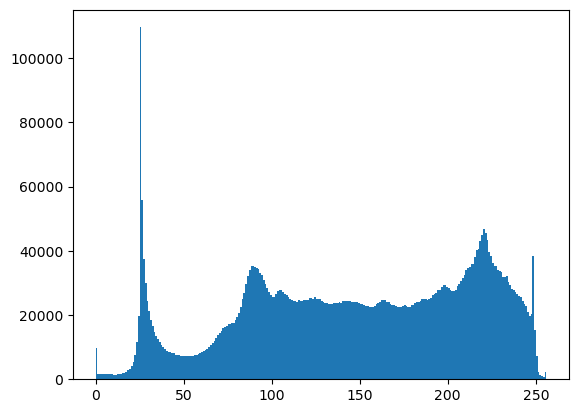

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

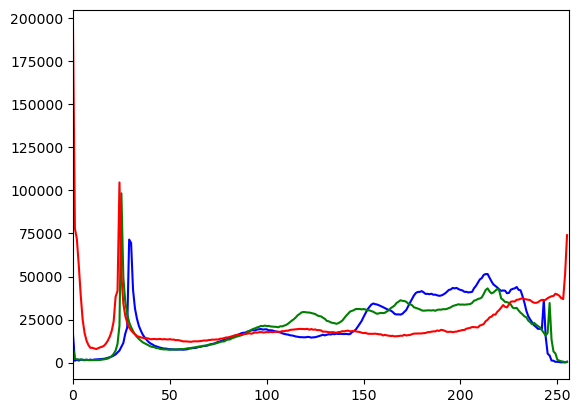

In [8]:
img = cv2.imread('beach-clouds-daytime-994605.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

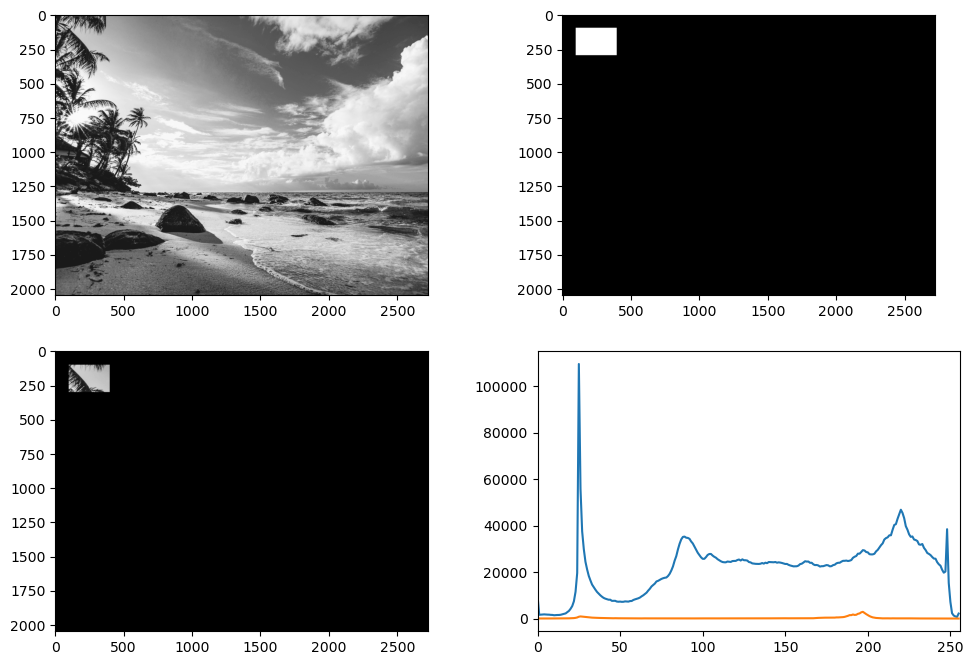

In [9]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

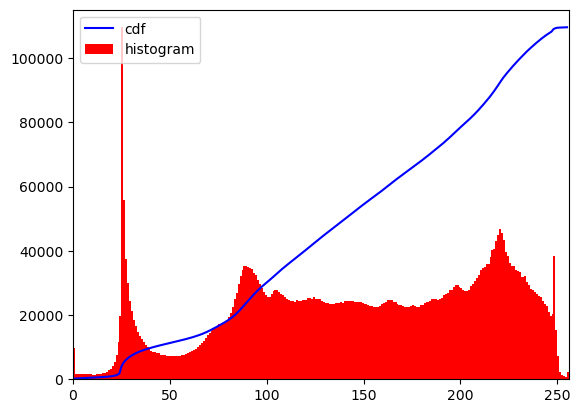

In [10]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [11]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [12]:
img2 = cdf[img]

In [13]:
cv2.imshow('image',img)
cv2.imshow('img2',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

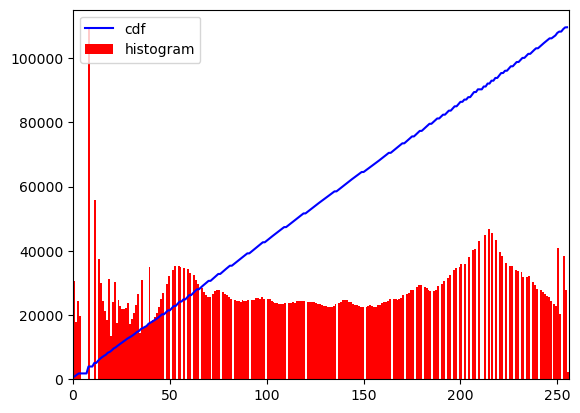

In [14]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [15]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [17]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)

True

## https://en.wikipedia.org/wiki/Adaptive_histogram_equalization

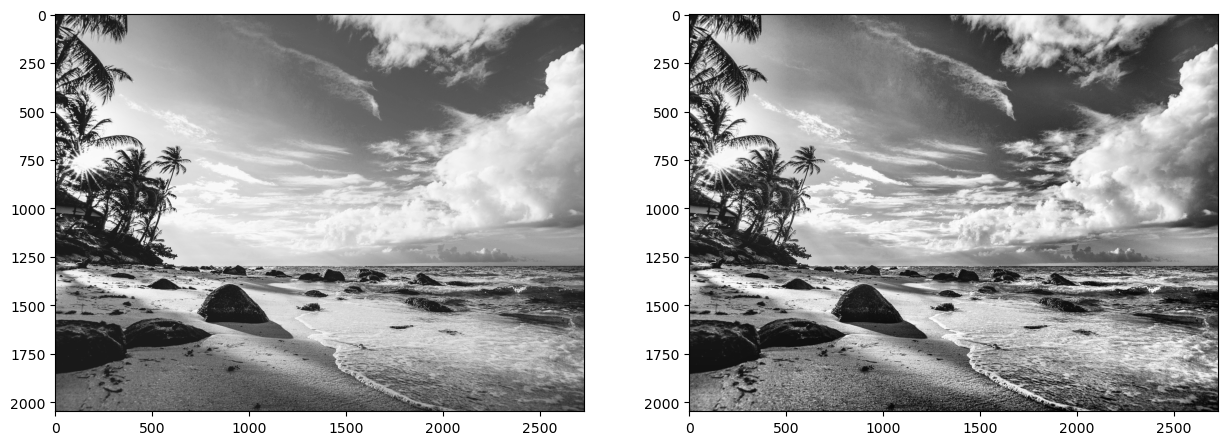

In [18]:
plt.figure(figsize=(15,30))
plt.subplot(1,2,1), plt.imshow(img,'gray')
plt.subplot(1,2,2), plt.imshow(cl1,'gray')
plt.show()

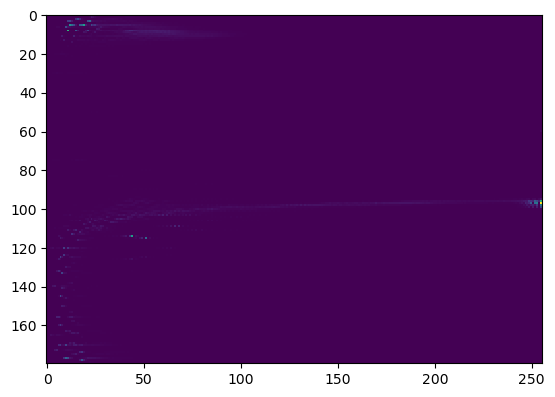

In [19]:
img = cv2.imread('beach-clouds-daytime-994605.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()